In [1]:
%reload_ext vimception

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
%matplotlib inline
from __future__ import division
import sys
sys.path.insert(0, '../PKModelling')
from pkModelling import *
from InteractivePKModelling import *

# QIN Prostate

## Reading the images

In [9]:
imageFile = "../Data/QIN_Prostate/QIN-PROSTATE-01-0001.nrrd"
labelFile = "../Data/QIN_Prostate/01_label.nrrd"
# Reading the DCE-MRI image
image = sitk.ReadImage(imageFile)
label = sitk.ReadImage(labelFile)
# Getting the numpy arrays from the images
ndaImage = sitk.GetArrayFromImage(image)
ndaLabel = sitk.GetArrayFromImage(label)

## Read MR Parameters

In [10]:
frameLabels = image.GetMetaData('MultiVolume.FrameLabels')
frameLabelsArray = np.array([x.strip() for x in frameLabels.split(',')],dtype=float)
frameLabelsDiff = np.ediff1d(frameLabelsArray)
# Todo: Check that all differences are the same
samplingRate = frameLabelsDiff[0]
if  image.GetMetaData('MultiVolume.FrameIdentifyingDICOMTagUnits') == 'ms':
    samplingRate = samplingRate/1000
else:
    print 'Warning: Check the frames time units. The units are not in miliseconds'
FA = float(image.GetMetaData('MultiVolume.DICOM.FlipAngle'))
TR = float(image.GetMetaData('MultiVolume.DICOM.RepetitionTime'))
print 'Sampling Rate: ', samplingRate, ', TR: ', TR, ', FA: ',FA

Sampling Rate:  4.27 , TR:  3.776 , FA:  15.0


## Measuring AIF

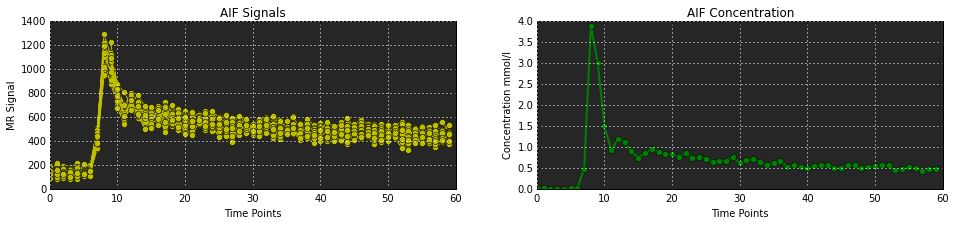

In [11]:
m,n,p,q = np.shape(ndaImage)
# Make the AIF signal
# For now it uses the first one change it to a more sophisticated one
meanSp = np.zeros(q)
fig = figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1,2,1,axisbg='0.15')
for i in xrange(0,m):
    for j in xrange(0,n):
        for k in xrange(0,p):
            # The AIF is marked as 3 in the label map
            if ndaLabel[i,j,k] == 3:
                sp = ndaImage[i,j,k,:]
                plot(sp,'yo-')
                meanSp = (meanSp + ndaImage[i,j,k,:])/2
ax1.grid(color='w',linewidth='1')
ax1.set_title('AIF Signals')
ax1.set_xlabel('Time Points')
ax1.set_ylabel('MR Signal')
converter = SignalToConcentrationConverter()
converter.signal = meanSp
converter.BAT = 5
converter.T10 = 1600
converter.Relaxivity = 0.0039
converter.FA = FA
converter.TR = TR
aif = converter.convert()
ax2 = plt.subplot(1,2,2, axisbg='0.15')
ax2.grid(color='w',linewidth='1')
ax2.set_title('AIF Concentration')
ax2.set_xlabel('Time Points')
ax2.set_ylabel('Concentration mmol/l')
plot(aif,'go-' ,linewidth=2)


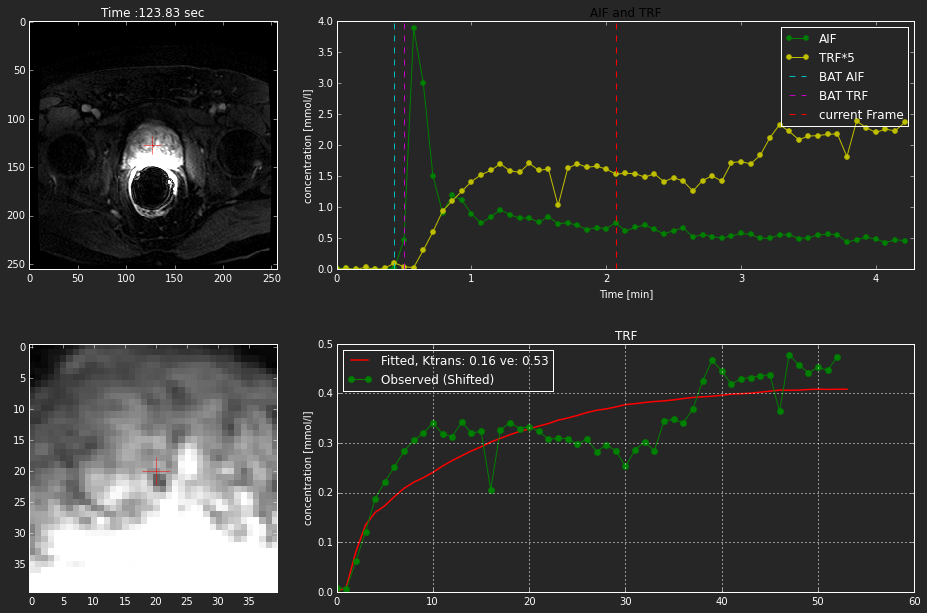

In [12]:
a = InteractivePKModelling(ndaImage, aif, FA, TR, 1597,5,0.0039,0.4,samplingRate,6,7)
a.browseImages()

# QIBA Phantom

## Reading Images

In [13]:
imageFile = "../Data/QIBA_v8_Tofts_4s_0s/QIBA_v8_Tofts_4s_0s.nrrd"
labelFile = "../Data/QIBA_v8_Tofts_4s_0s/label.nrrd"
# Reading the DCE-MRI image
#image = sitk.ReadImage(dataDir + "QIBA_v8_Tofts_4s_0s.nrrd")
image = sitk.ReadImage(imageFile)
label = sitk.ReadImage(labelFile)
# Getting the numpy arrays from the images
ndaImage = sitk.GetArrayFromImage(image)
ndaLabel = sitk.GetArrayFromImage(label)

## Reading MR Parameters

In [14]:
frameLabels = image.GetMetaData('MultiVolume.FrameLabels')
frameLabelsArray = np.array([x.strip() for x in frameLabels.split(',')],dtype=float)
frameLabelsDiff = np.ediff1d(frameLabelsArray)
# Todo: Check that all differences are the same
samplingRate = frameLabelsDiff[0]
if  image.GetMetaData('MultiVolume.FrameIdentifyingDICOMTagUnits') == 'ms':
    samplingRate = samplingRate/1000
else:
    print 'Warning: Check the frames time units. The units are not in miliseconds'
FA = float(image.GetMetaData('MultiVolume.DICOM.FlipAngle'))
TR = float(image.GetMetaData('MultiVolume.DICOM.RepetitionTime'))
show_args(Sampling_Rate=samplingRate, Flip_Angle= FA, Repetition_Time= TR)

Repetition_Time,5.0
Sampling_Rate,4.0
Flip_Angle,30.0


##AIF

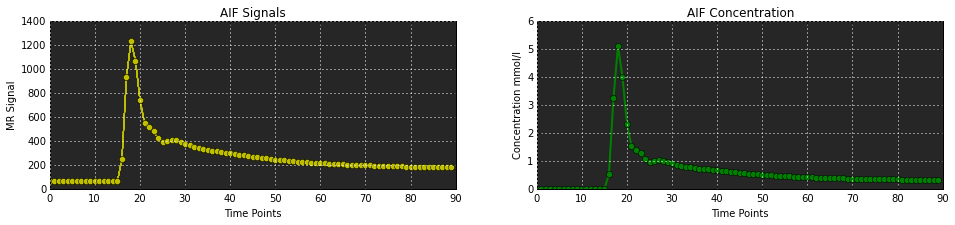

In [15]:
m,n,p,q = np.shape(ndaImage)
# Make the AIF signal
# For now it uses the first one change it to a more sophisticated one
meanSp = np.zeros(q)
fig = figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1,2,1,axisbg='0.15')
for i in xrange(0,m):
    for j in xrange(0,n):
        for k in xrange(0,p):
            # The AIF is marked as 3 in the label map
            if ndaLabel[i,j,k] == 3:
                sp = ndaImage[i,j,k,:]
                plot(sp,'yo-')
                meanSp = (meanSp + ndaImage[i,j,k,:])/2
ax1.grid(color='w',linewidth='1')
ax1.set_title('AIF Signals')
ax1.set_xlabel('Time Points')
ax1.set_ylabel('MR Signal')
converter = SignalToConcentrationConverter()
converter.signal = meanSp
converter.BAT = 5
converter.T10 = 1600
converter.Relaxivity = 0.0039
converter.FA = FA
converter.TR = TR
aif = converter.convert()
ax2 = plt.subplot(1,2,2, axisbg='0.15')
ax2.grid(color='w',linewidth='1')
ax2.set_title('AIF Concentration')
ax2.set_xlabel('Time Points')
ax2.set_ylabel('Concentration mmol/l')
plot(aif,'go-' ,linewidth=2)

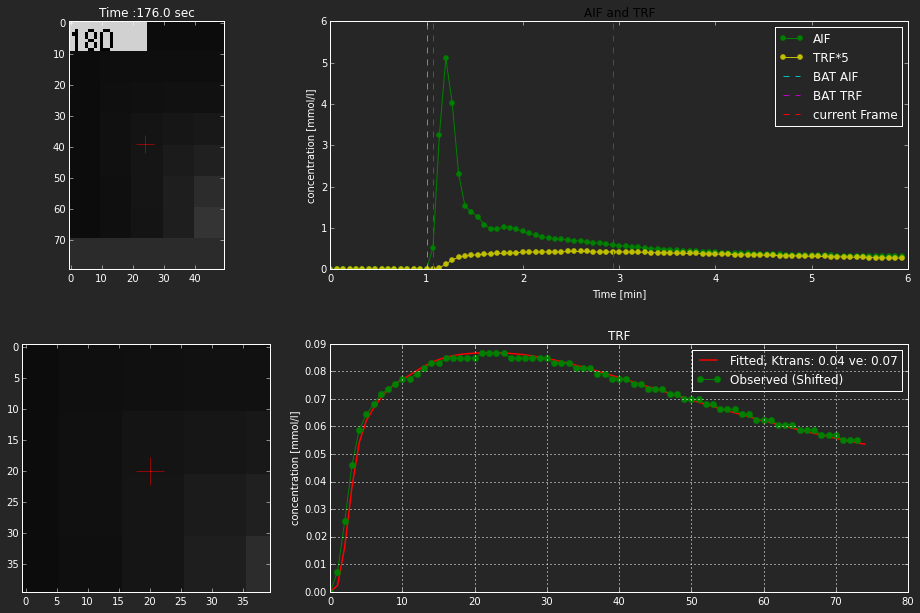

In [16]:
a = InteractivePKModelling(ndaImage, aif, FA, TR, 1597,5,0.0039,0.4,samplingRate,15,16)
a.browseImages()